In [1]:
# we will start by importing important libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [5]:
# read and look at the data
df = pd.read_csv("C:/Users/prashant91/Desktop/CODE BEGINNER/DATASETS/Customer Churn/churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
# to show no. of rows and column
df.shape

(7043, 21)

In [9]:
# to show name of the columns
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [12]:
# to check for null or na or missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
# to show some statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
# to get customer churn
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

C:\Users\prashant91\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

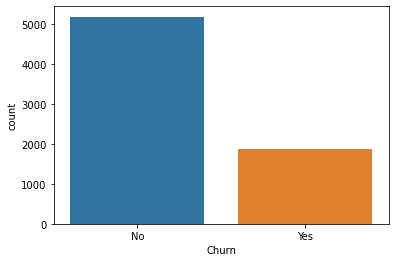

In [16]:
# visualize the customer churn
sns.countplot(df['Churn'])

In [17]:
# to see the percentage of customer churn
numRetained = df[df.Churn == 'No'].shape[0]
numChurned = df[df.Churn == 'Yes'].shape[0]

# to print the percentage of customers churned and not churned
print((numChurned/(numRetained+numChurned))*100,'% of customers that left the company') 
print((numRetained/(numRetained+numChurned))*100,'% of customers that stayed with the company') 

26.536987079369588 % of customers that left the company
73.4630129206304 % of customers that stayed with the company


<AxesSubplot:xlabel='gender', ylabel='count'>

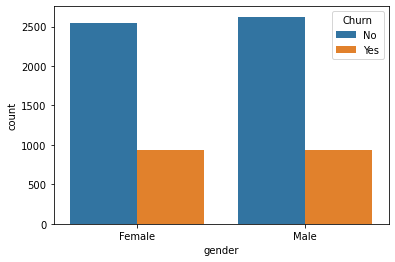

In [18]:
# Visualize the churn count for both males and females

sns.countplot(x= 'gender', hue= 'Churn',data= df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

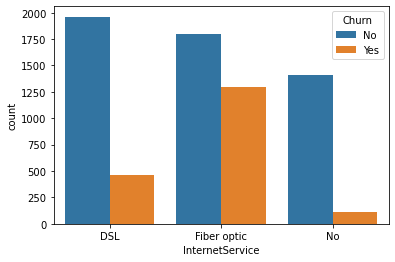

In [19]:
# Visualize the churn count for the internet service
sns.countplot(x='InternetService', hue= 'Churn', data= df)

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>], dtype=object)

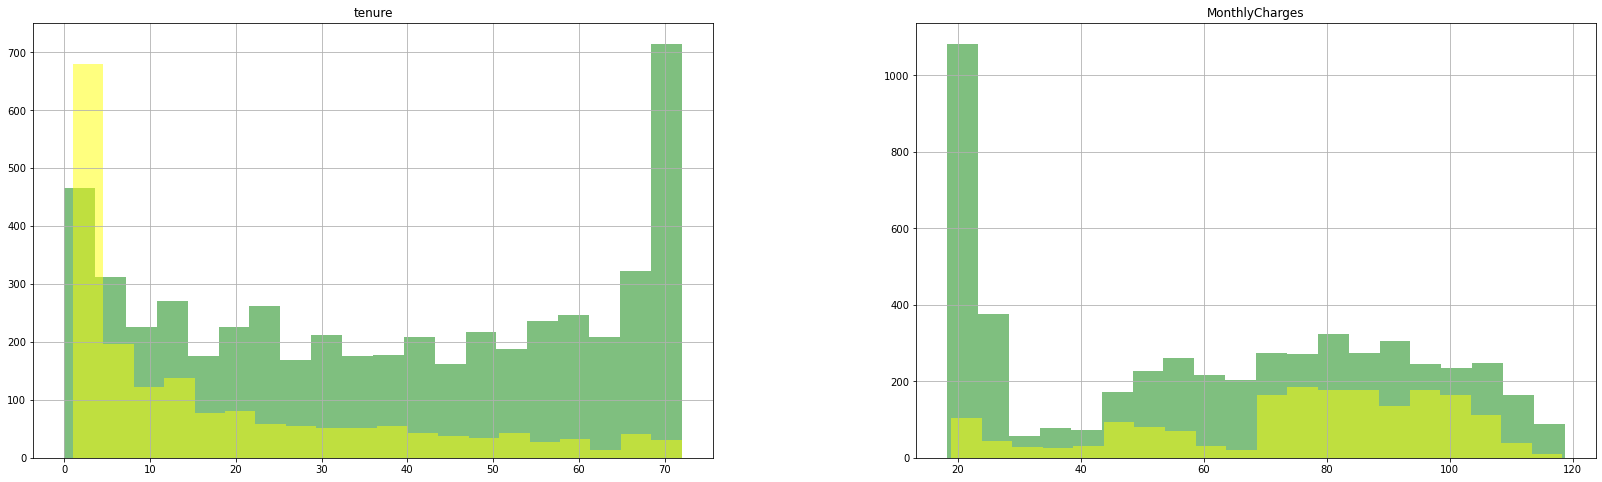

In [24]:
# To Visualize Numeric data
numericFeatures = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28,8))
df[df.Churn == 'No'][numericFeatures].hist(bins=20, color = 'green', alpha = 0.5, ax=ax)
df[df.Churn == 'Yes'][numericFeatures].hist(bins=20, color = 'yellow', alpha = 0.5, ax=ax)

In [27]:
# To remove unnecessary columns
cleanDF = df.drop('customerID', axis=1)
cleanDF

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [28]:
# Convert all the non-numeric columns to numeric
for column in cleanDF:
    if cleanDF[column].dtype == np.number:
        continue
    cleanDF[column] = LabelEncoder().fit_transform(cleanDF[column])
    

<ipython-input-28-d1b27e7383c0>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleanDF[column].dtype == np.number:


In [31]:
#To show the data types
cleanDF.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [32]:
# To show first 5 rows of the new data
cleanDF

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [33]:
# Scale the data
x = cleanDF.drop('Churn',axis=1)
y = cleanDF['Churn']
x = StandardScaler().fit_transform(x)

In [34]:
# Split the data into 80% training and 20% testing
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [35]:
# Create and Train the model
model = LogisticRegression()

# Train the model
model.fit(xtrain, ytrain)

LogisticRegression()

In [36]:
# Create the predictions on the test data
predictions = model.predict(xtest)

# print the predictions

print(predictions)

[1 0 0 ... 0 0 0]


In [37]:
# And Finally check the precision, recall and f1-score
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

